In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time

In [2]:
cc_data=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
cc_data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
cc_data.set_index('Quarter',inplace=True)
cc_data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [4]:
cc_data.isnull().sum()

Sales    0
dtype: int64

In [5]:
print('Shape of the data', cc_data.shape)

Shape of the data (42, 1)


In [6]:
cc_data.dtypes

Sales    float64
dtype: object

In [7]:
cc_data.nunique()

Sales    42
dtype: int64

In [8]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Q1_86 to Q2_96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0+ bytes


<Axes: xlabel='Quarter'>

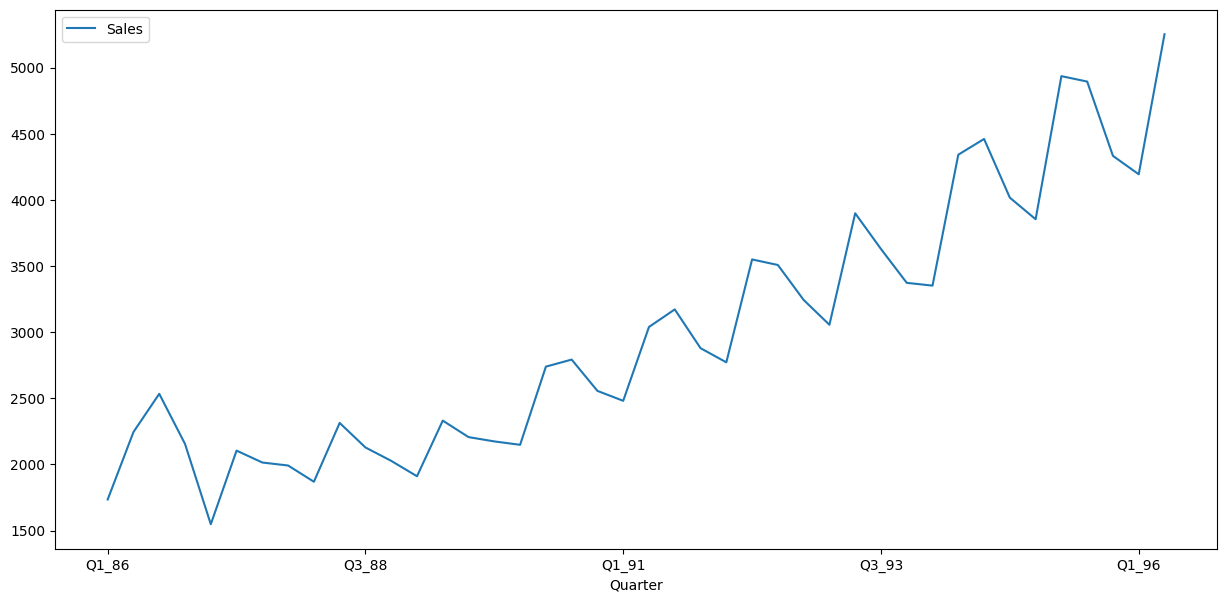

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
cc_data.plot()

<Axes: xlabel='Sales'>

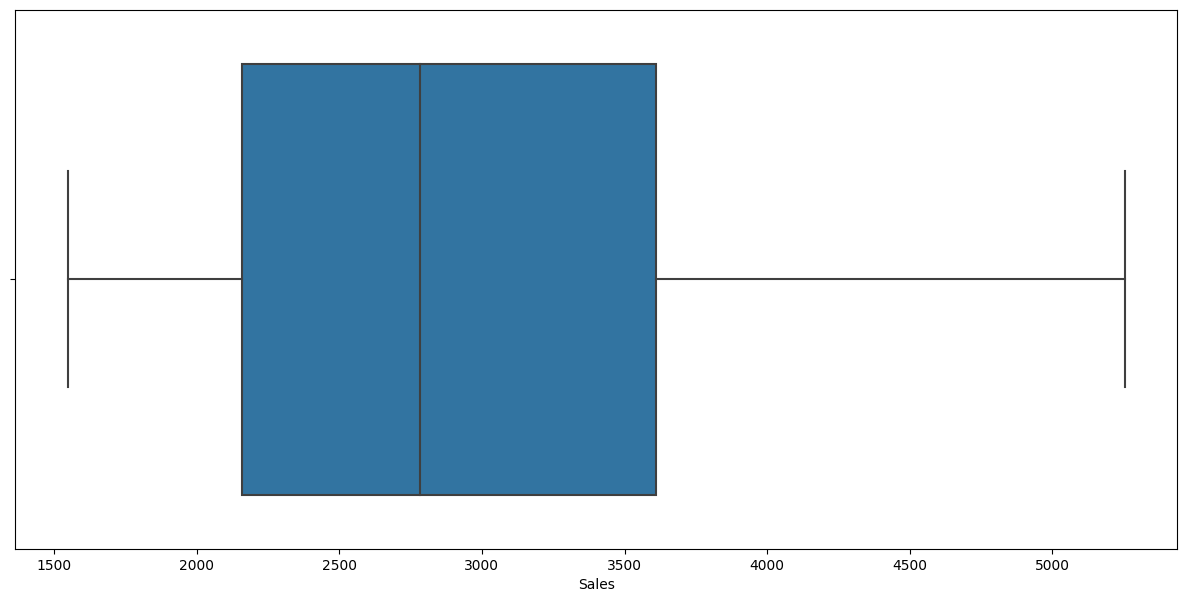

In [10]:
sns.boxplot(x="Sales",data=cc_data)

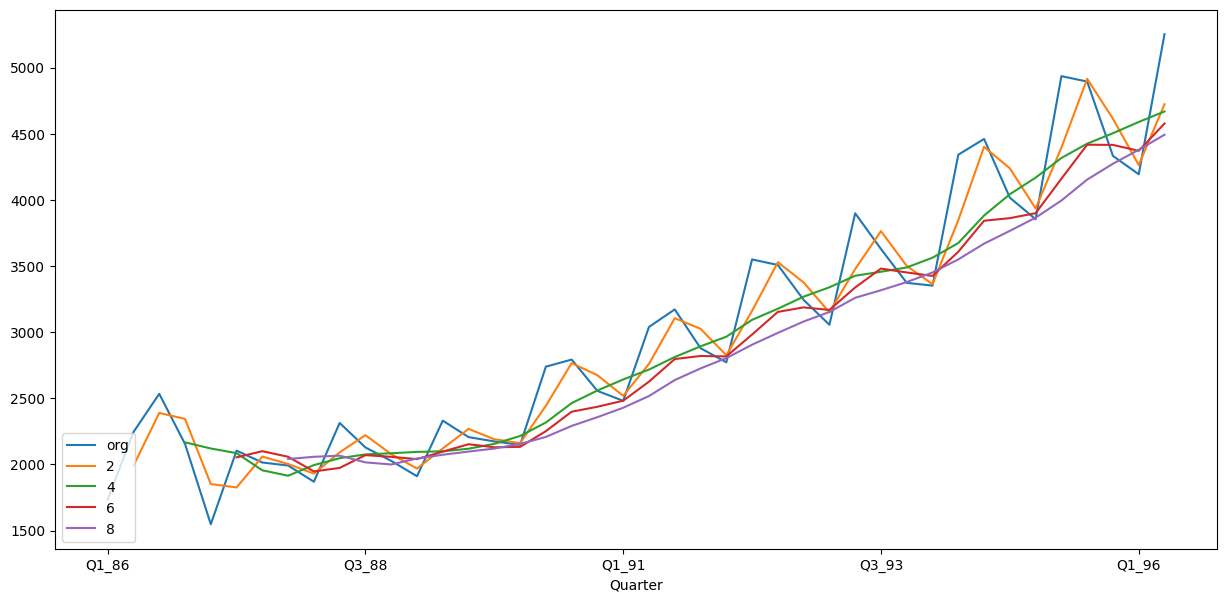

In [11]:
cc_data.Sales.plot(label="org")
for i in range(2,10,2):
    cc_data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

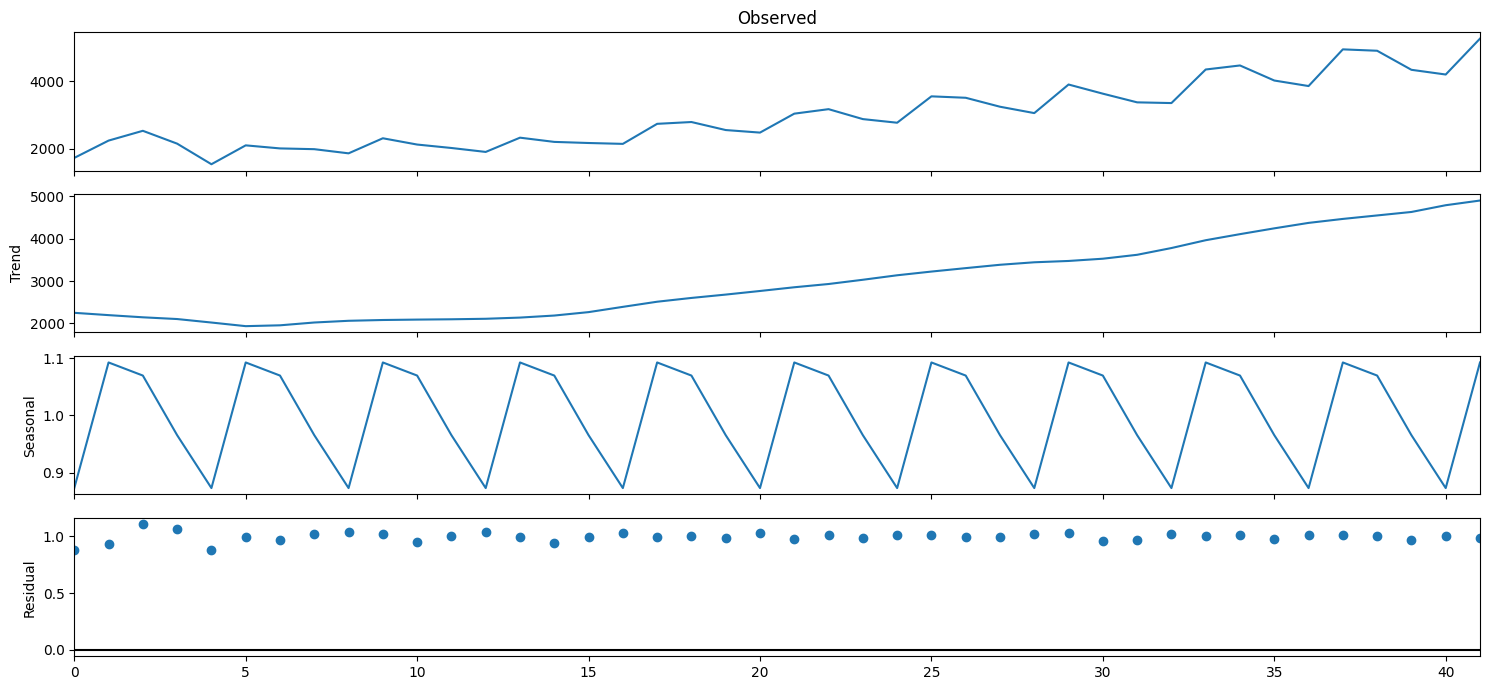

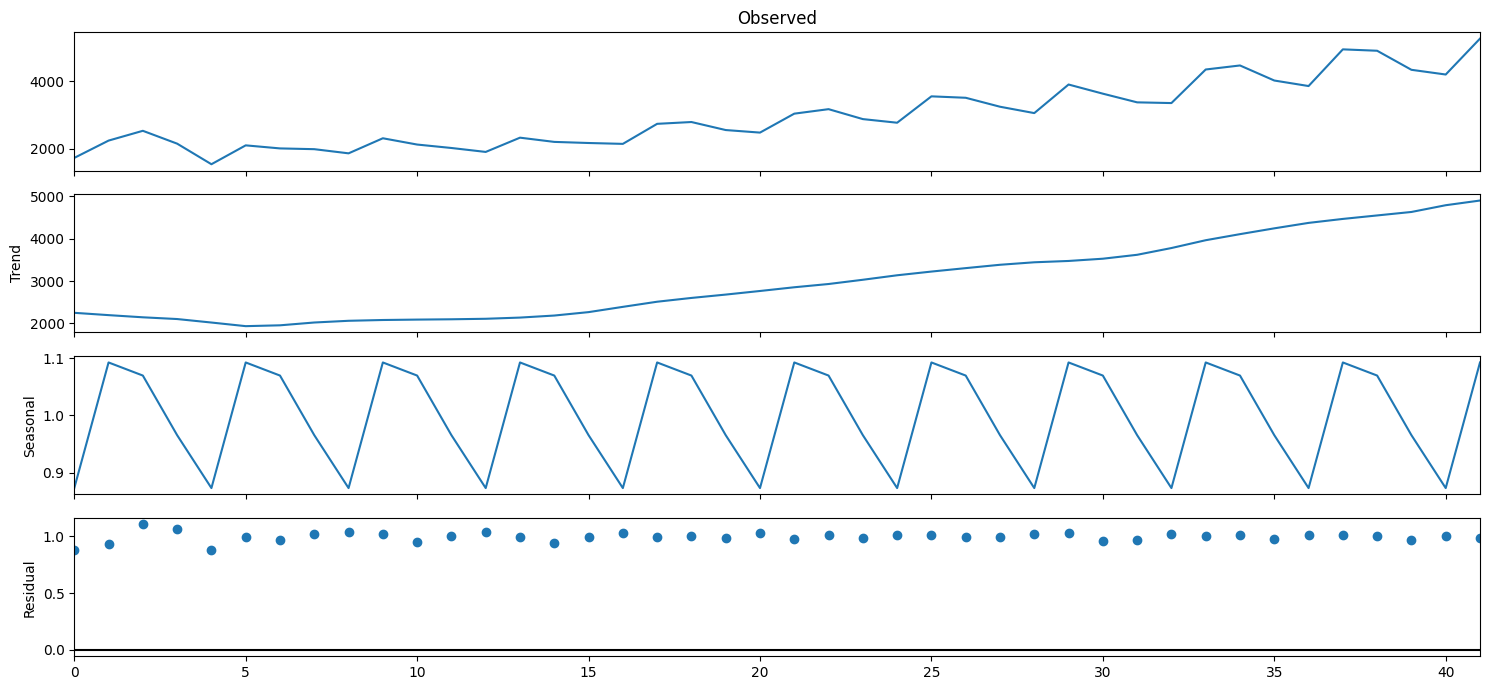

In [12]:
ts_decom=seasonal_decompose(np.array(cc_data['Sales']),model='multiplicative',period=4,extrapolate_trend=4)
ts_decom.plot()

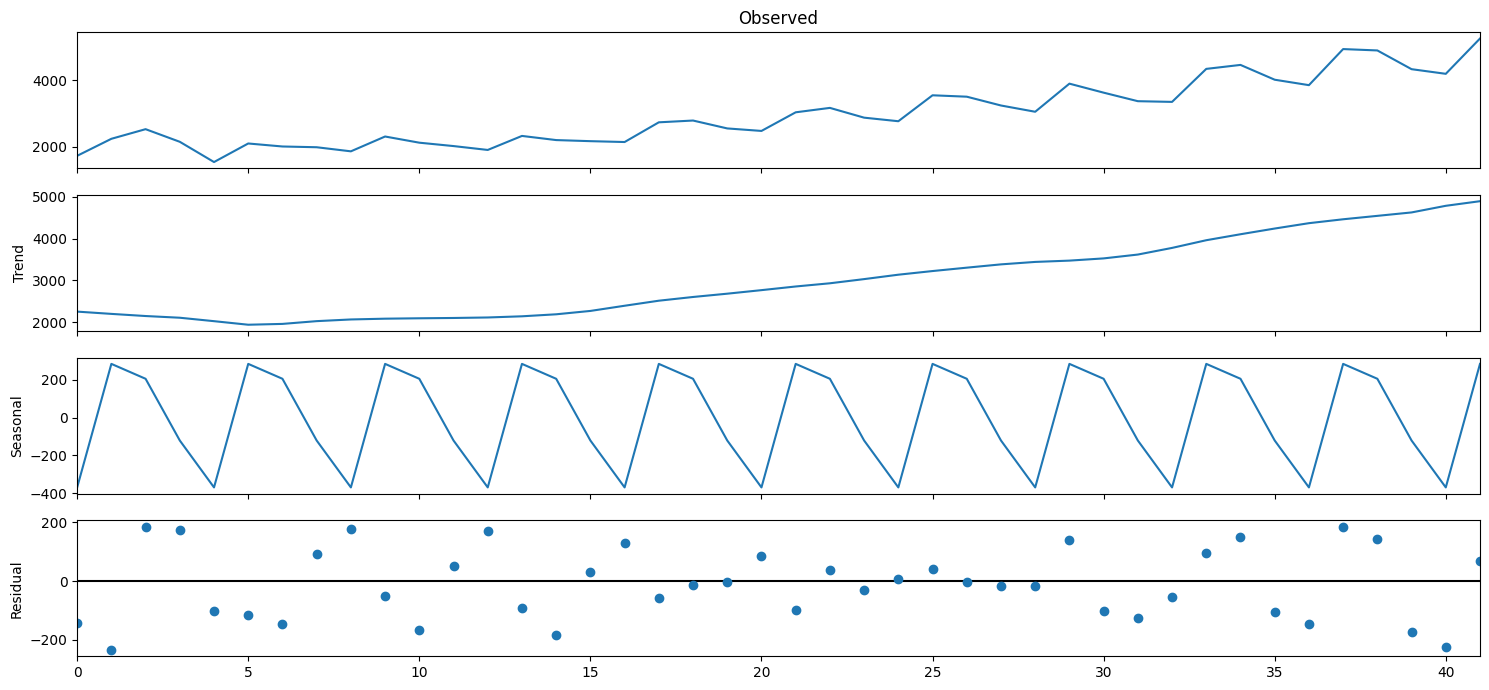

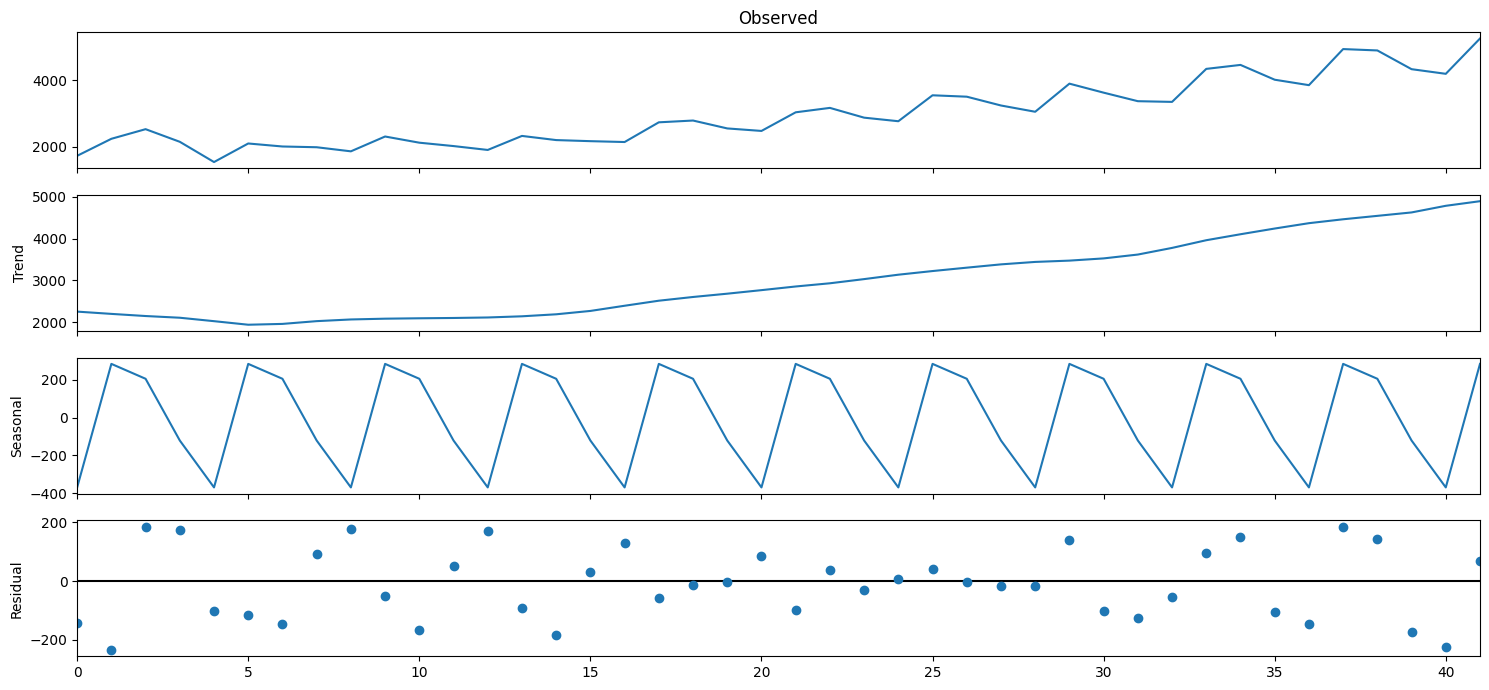

In [13]:
ts_decom=seasonal_decompose(np.array(cc_data['Sales']),model='additive',period=4,extrapolate_trend=4)
ts_decom.plot()

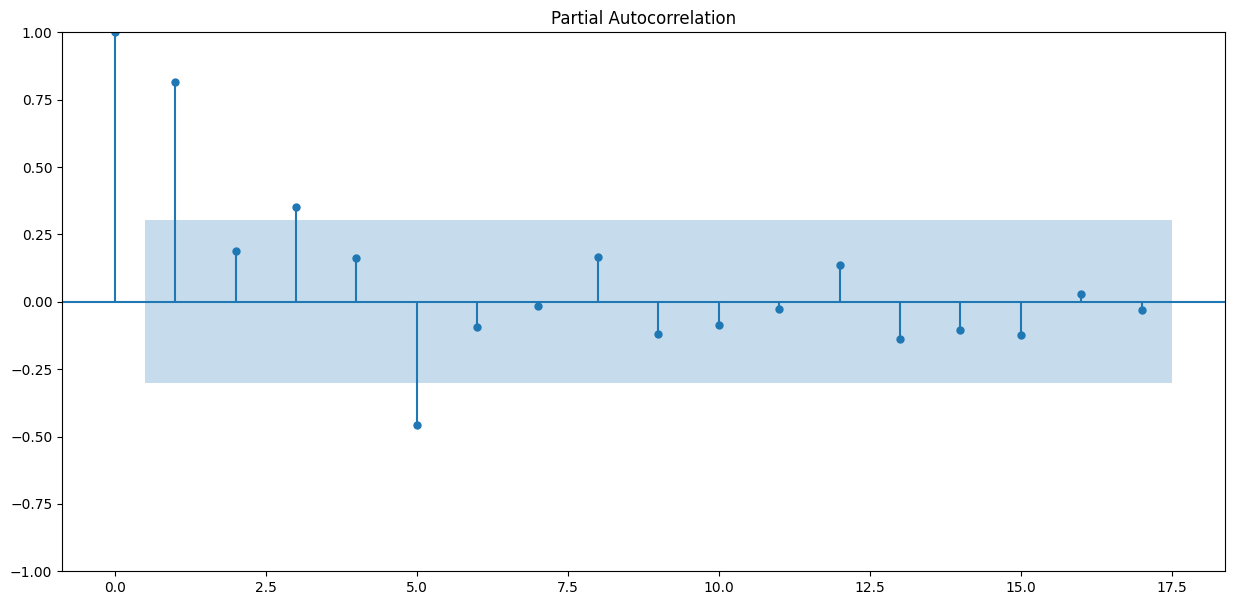

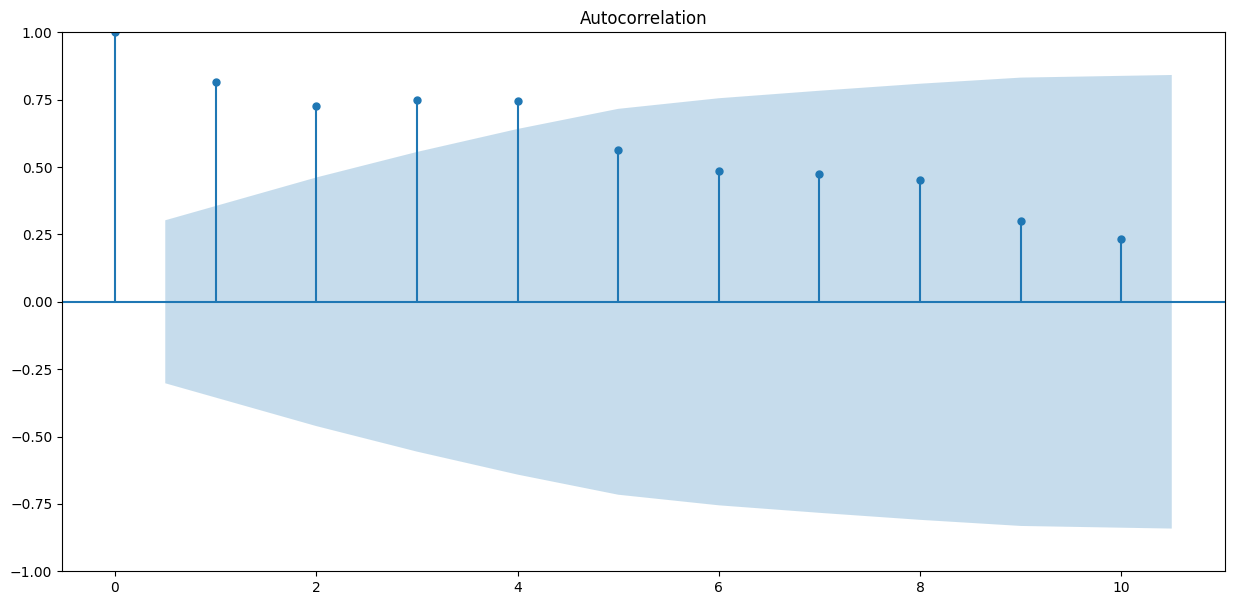

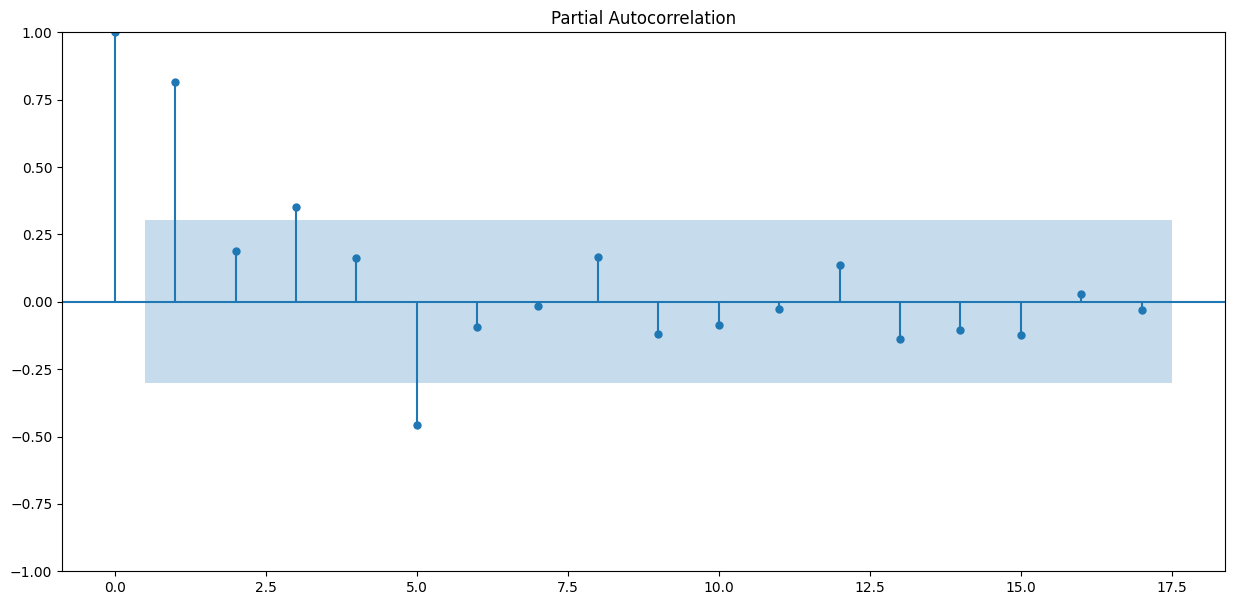

In [14]:
tsa_plots.plot_acf(cc_data.Sales,lags=10)
tsa_plots.plot_pacf(cc_data.Sales)

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
test_result=adfuller(cc_data['Sales'])

In [17]:
def adfuller_test(Sales):
    result=adfuller(Sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")
adfuller_test(cc_data['Sales'])  

ADF Test Statistic : 1.3094210153268104
p-value : 0.9966611673930905
#Lags Used : 7
Number of Observations : 34
weak evidence against null hypothesis,indicating it is non-stationary 


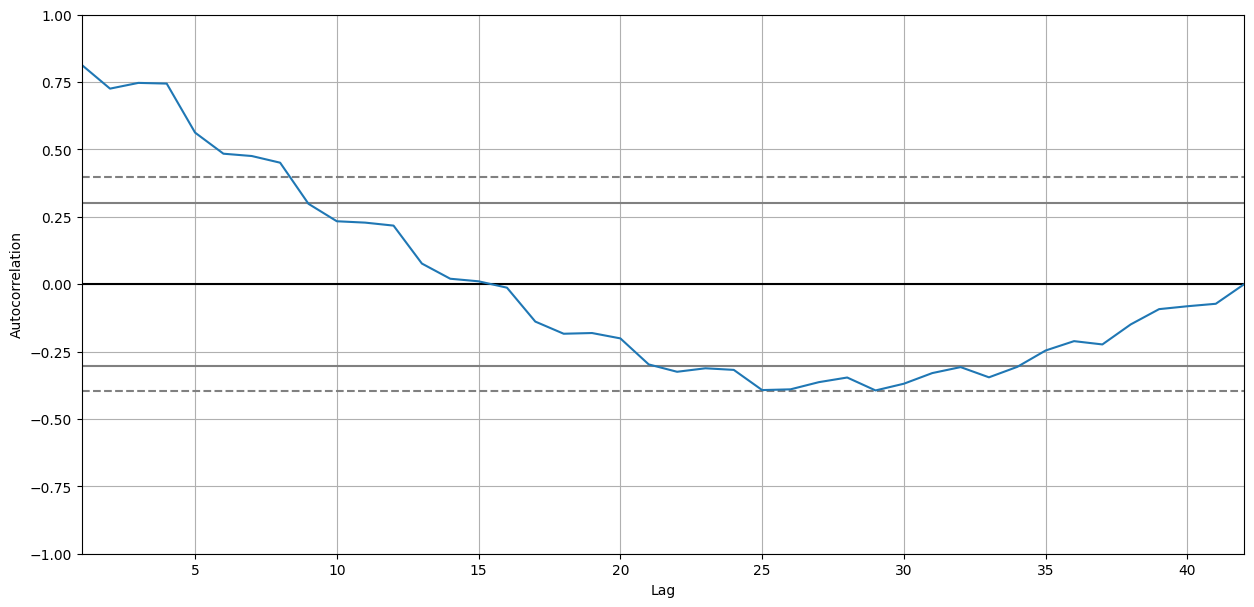

In [18]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(cc_data['Sales'])
plt.show()

In [19]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(cc_data['Sales'], order=(1, 1, 1))
model_fit = model.fit()
model_fit.summary()

C:\Users\shlok\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shlok\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shlok\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   42
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -304.931
Date:                Sat, 26 Aug 2023   AIC                            615.862
Time:                        20:36:26   BIC                            621.002
Sample:                             0   HQIC                           617.734
                                 - 42                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1888      0.469      0.403      0.687      -0.731       1.108
ma.L1         -0.5873      0.438     -1.340      0.180      -1.447       0.272
sigma2      1.656e+05   4.47e+04      3.704      0.000     7.8e+04    2.53e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 2.74
Prob(Q):                              0.75   Prob(JB):                         0.25
Heteroskedasticity (H):               2.93   Skew:                             0.60
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Quarter'>

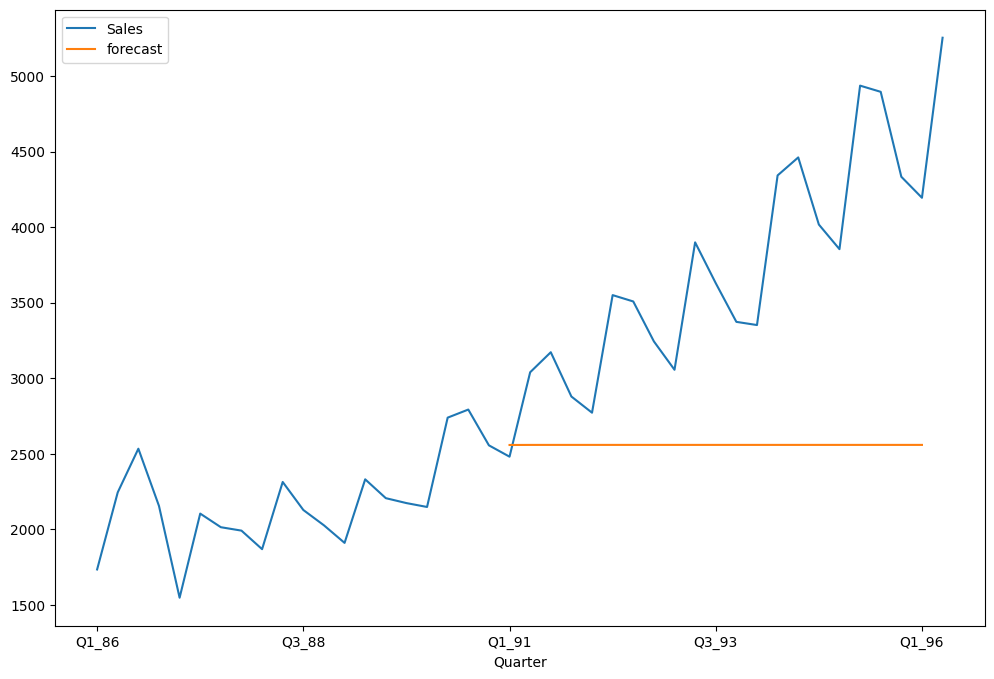

In [20]:
cc_data['forecast']=model_fit.predict(start=20,end=40,dynamic=True)
cc_data[['Sales','forecast']].plot(figsize=(12,8))

C:\Users\shlok\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shlok\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shlok\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shlok\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to esti

<Axes: xlabel='Quarter'>

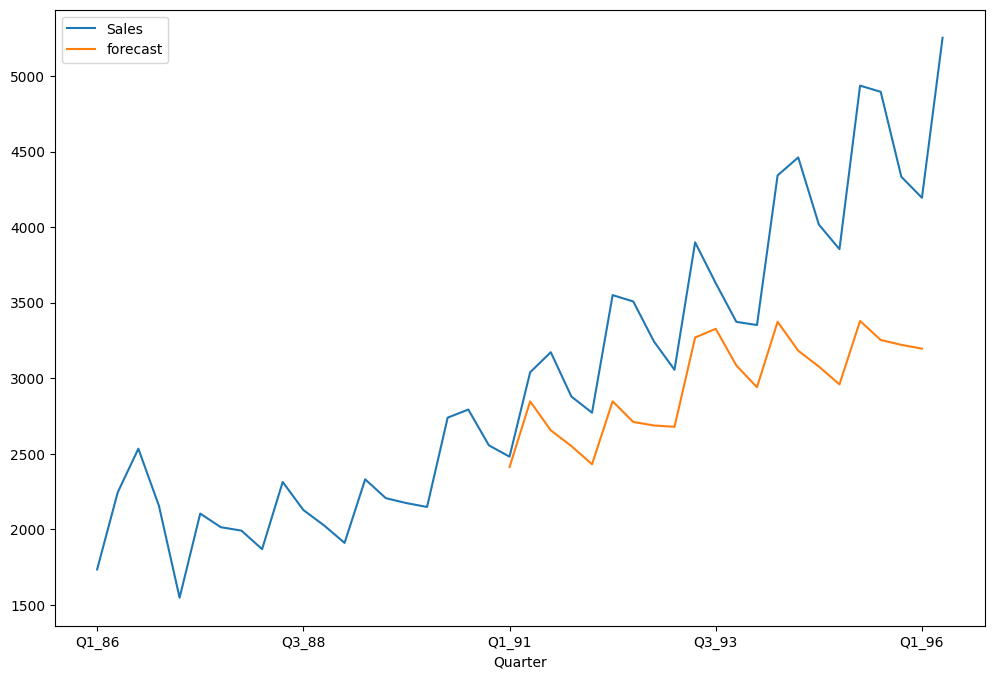

In [21]:
import statsmodels.api as sm
model=sm.tsa.ARIMA(cc_data['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
cc_data['forecast']=results.predict(start=20,end=40,dynamic=True)
cc_data[['Sales','forecast']].plot(figsize=(12,8))